# Pattern exploration
---

In [40]:
from IPython.display import SVG
import numpy as np
import pickle
from scipy import sparse

from sknetwork.data import load_netset
from sknetwork.utils import get_degrees
from sknetwork.visualization import svg_graph

In [141]:
def preprocess_data(biadjacency, names_col, s):
    # Frequent attributes
    freq_attribute = get_degrees(biadjacency.astype(bool), transpose=True)
    index = np.flatnonzero((freq_attribute <= 1000) & (freq_attribute >= s))

    # Filter data with index
    biadjacency = biadjacency[:, index]
    words = names_col[index]
    freq_attribute = freq_attribute[index]
    
    # Sort data
    sort_index = np.argsort(freq_attribute)
    sorted_biadjacency = biadjacency[:, sort_index]
    words = words[sort_index]
    return sorted_biadjacency, words

def get_pattern(patterns, i):
    return patterns[i][0], patterns[i][1]

def display_pattern(adjacency, nodes, names, labels):
    return SVG(svg_graph(adjacency[nodes, :][:, nodes] + sparse.identity(len(nodes)), names=names[nodes], labels=labels[nodes]))

## Parameters  

Select:
- dataset: either `wikivitals`, `wikivitals-fr` or `wikischools`
- $s$ and $\beta$: support parameters (here 5)
- order_attributes: initial ordering of attributes (here True)

In [150]:
# Parameters for UnexPatterns
dataset = 'wikivitals'
s = 5
beta = 5
order_attributes = True

**Load graph data and preprocess it (e.g attribute ordering)**

In [151]:
graph = load_netset(dataset)
adjacency = graph.adjacency
biadjacency = graph.biadjacency
names = graph.names
names_col = graph.names_col
labels = graph.labels

# Preprocess data (get same attribute order as in UnexPattern)
new_biadjacency, words = preprocess_data(biadjacency, names_col, s)

Parsing files...
Done.


**Load `UnexPatterns` output**

Output of algorithm is a list of patterns, i.e. a list of tuples (nodes, attributes).

In [152]:
with open(f'result_{dataset}_{beta}_{s}_order{str(order_attributes)}.bin', 'rb') as data:
    res = pickle.load(data)

In [153]:
print(f'Number of patterns found: {len(res)}')

Number of patterns found: 1116


In [154]:
# First pattern (pattern of index 0 is the starting point of lattice)
idx = 1 #np.random.choice(len(res))
print(res[idx])

nodes = res[idx][0]
attributes = res[idx][1]
print(names[nodes], words[attributes])

([1263, 1322, 1895, 7471, 7571], [45, 7520, 17492, 17608, 17973])
['Brown' 'CMYK color model' 'Color' 'RGB color model' 'Red'] ['cmyk' 'RGB' 'red' 'color' 'model']


**Display pattern**

Pattern index: 157
Attributes: ['perestroika' 'Gorbachev' 'Mikhail' 'Communist' 'soviet' 'Party' 'Soviet'
 'reform' 'leader' 'Union']


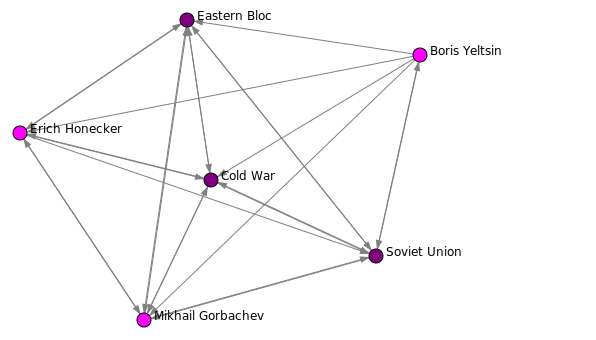

In [155]:
# Random pattern
idx = np.random.choice(len(res))
nodes, attributes = get_pattern(res, idx)

print(f'Pattern index: {idx}')
print(f'Attributes: {words[attributes]}')

# Display pattern
display_pattern(adjacency, nodes, names, labels)

## Pattern from keywords

Select pattern related to specific keywords, i.e. patterns that contain **at least one** keyword in list.

In [175]:
def get_patterns(patterns, keyword, words):
    res = []
    for p in patterns:
        for w in keywords:
            index = np.argwhere(words==w)
            if len(index) > 0:
                if int(index) in p[1]:
                    res.append(p)
                    break
            else:
                raise Exception(f'keyword: {w} is not found.')
    return res

In [176]:
# Select keywords
print(f'Some random words to get inspiration: {np.random.choice(words, 15)}')

Some random words to get inspiration: ['Albert' 'December' 'Municipal' 'Duke' 'sometime' 'reflect' 'clutch'
 'Bhakti' 'unintentionally' 'train' 'gloss' 'honest' 'Modi' 'Ebola'
 'hegemony']


In [179]:
# Chose keywords
keywords = ['piracy', 'music']

In [180]:
kw_patterns = get_patterns(res, keywords, words)
print(f'Number of patterns related to {keywords}: {len(kw_patterns)}')

Number of patterns related to ['piracy', 'music']: 39


Attributes of patter: ['Ravel' 'Maurice' 'repertoire' 'composer' 'music']


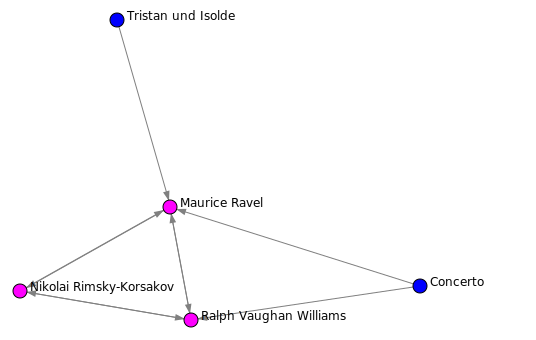

In [170]:
first_pattern = get_pattern(kw_patterns, 0)

print(f'Attributes of patter: {words[first_pattern[1]]}')
display_pattern(adjacency, first_pattern[0], names, labels)

Attributes of patter: ['Chart' 'Roll' 'chart' 'Rock' 'album' 'induct' 'recording' 'rock'
 'artist' 'UK' 'top' 'music' 'single' 'record']


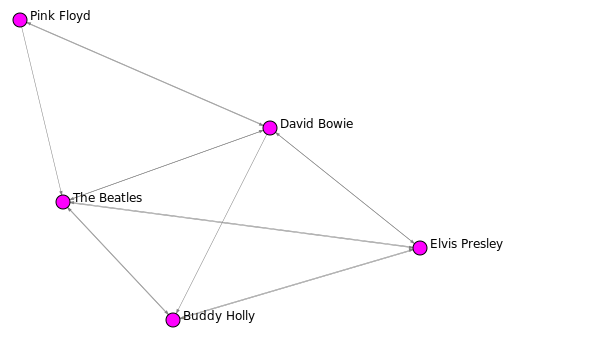

In [171]:
second_pattern = get_pattern(kw_patterns, 1)

print(f'Attributes of patter: {words[second_pattern[1]]}')
display_pattern(adjacency, second_pattern[0], names, labels)